In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"D:\ML Project1\bank note random forest\data_banknote_authentication.csv")
df.head()

,Variace,Skewness,cutrosis,entrosis,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#df tail
df.tail()

,Variace,Skewness,cutrosis,entrosis,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
df.shape

(1372, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variace   1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   cutrosis  1372 non-null   float64
 3   entrosis  1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,Variace,Skewness,cutrosis,entrosis,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df.columns

Index(['Variace', 'Skewness', 'cutrosis', 'entrosis', 'class'], dtype='object')

In [8]:
df.isnull().sum()

Variace     0
Skewness    0
cutrosis    0
entrosis    0
class       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(24)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1348, 5)

# Exploratory Data Analysis (EDA)

## Change Plot Style

In [12]:
sns.set_style('darkgrid')
plt.style.use('bmh')

## Univariate analysis

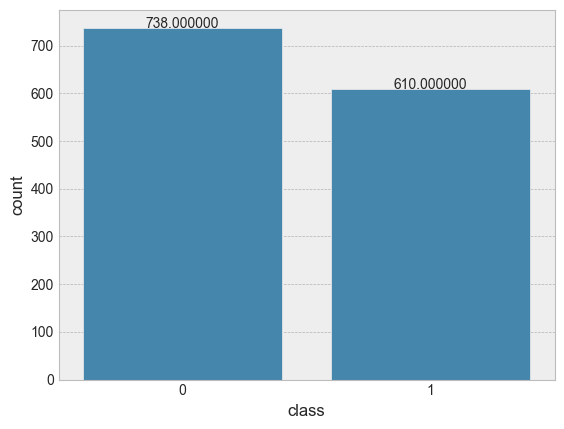

In [13]:
ax = sns.countplot(x ='class',data = df)
for p in ax.patches :
    ax.annotate('{:0f}'.format(p.get_height()),(p.get_x()+0.25 , p.get_height()))

<Figure size 2900x1700 with 0 Axes>

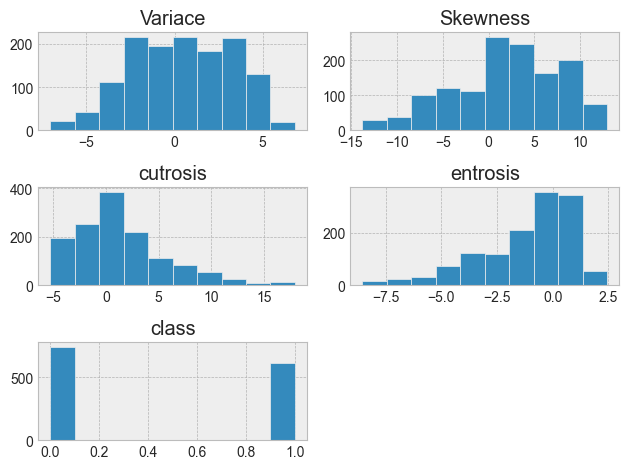

In [14]:
df.hist()
plt.tight_layout()
plt.Figure(figsize=(29,17))

Text(0.5, 1.0, 'Variance Distribution')

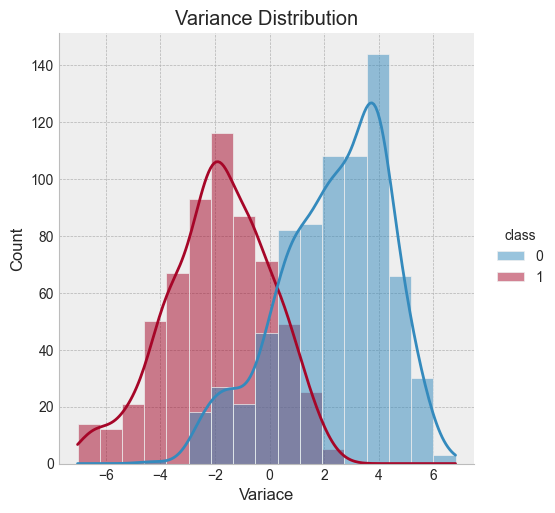

In [15]:
sns.displot(data = df , x= 'Variace', hue='class',kde= True)
plt.title('Variance Distribution')

Text(0.5, 1.0, 'Skewness Distribution')

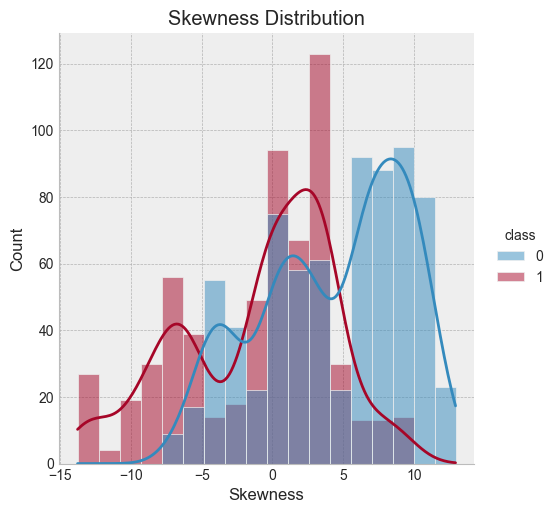

In [16]:
sns.displot(data = df , x='Skewness',hue='class',kde= True)
plt.title('Skewness Distribution')

Text(0.5, 1.0, 'Cutrosis distribution')

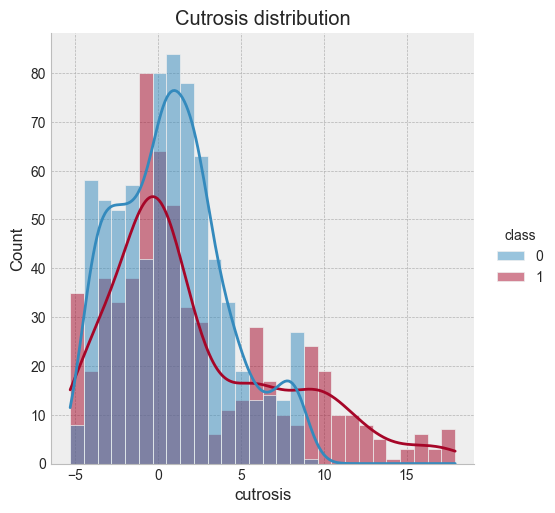

In [17]:
sns.displot(data = df , x = 'cutrosis', hue='class',kde=True)
plt.title('Cutrosis distribution')

Text(0.5, 1.0, 'Entrosis Distribution')

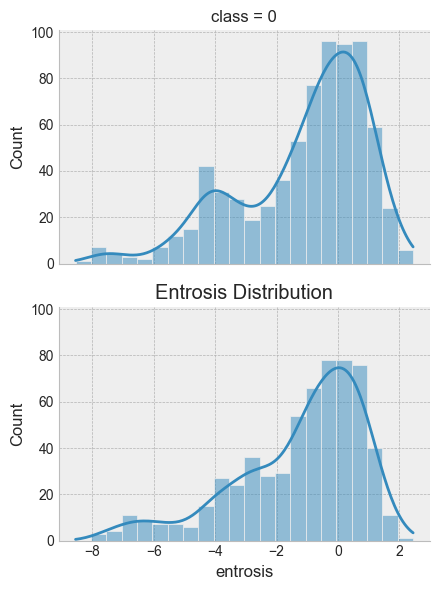

In [18]:
sns.displot(data=df,x='entrosis',row='class',kde=True,
            height=3,aspect=1.5)
plt.title('Entrosis Distribution')

## Bivariate Analysis

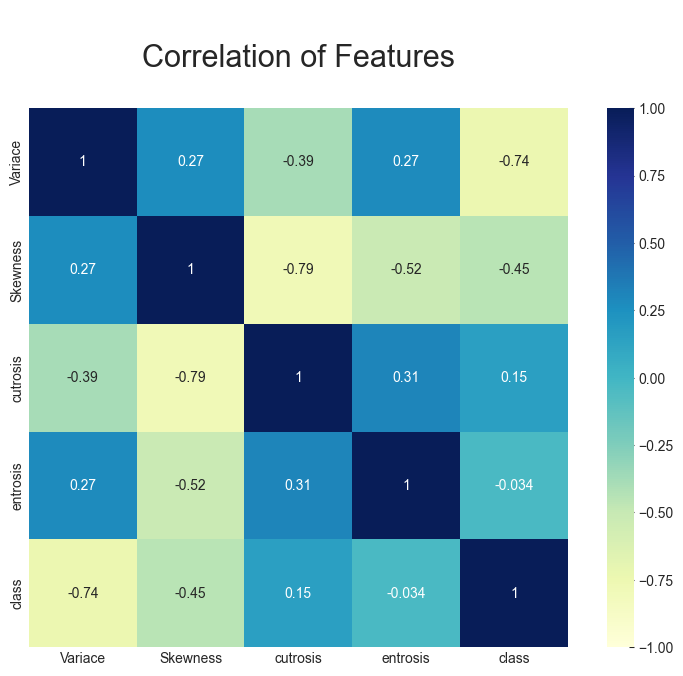

In [19]:
f,ax = plt.subplots(figsize=(10,7))
plt.title('\nCorrelation of Features\n',fontsize=22)
ax = sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,square=True,cmap="YlGnBu")

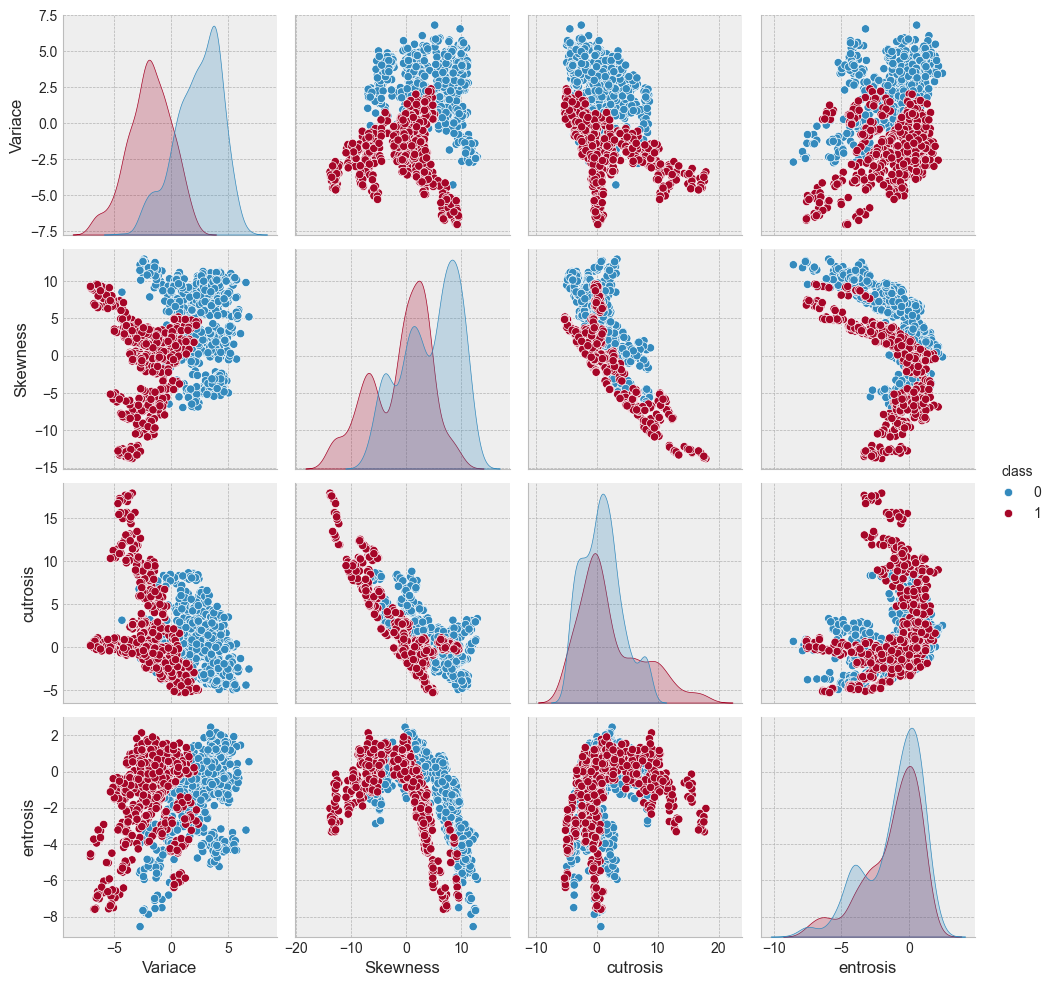

In [20]:
sns.pairplot(df,hue='class')

In [21]:
df.columns

Index(['Variace', 'Skewness', 'cutrosis', 'entrosis', 'class'], dtype='object')

In [22]:
features = ['Variace', 'Skewness', 'cutrosis', 'entrosis']
target = ['class']

In [23]:
X = df[features]
y = df[target]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(903, 4)
(445, 4)
(903, 1)
(445, 1)


### feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regration

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(penalty='elasticnet',solver = 'saga',l1_ratio = 0.7)
lr.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'elasticnet'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.7
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

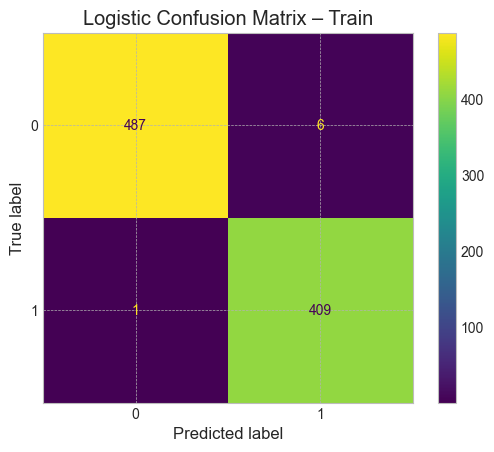

In [30]:
ConfusionMatrixDisplay.from_estimator(
    lr,
    X_train,
    y_train
)

plt.title('Logistic Confusion Matrix – Train')
plt.show()


Text(0.5, 1.0, 'Logistic Confution Matrix -test')

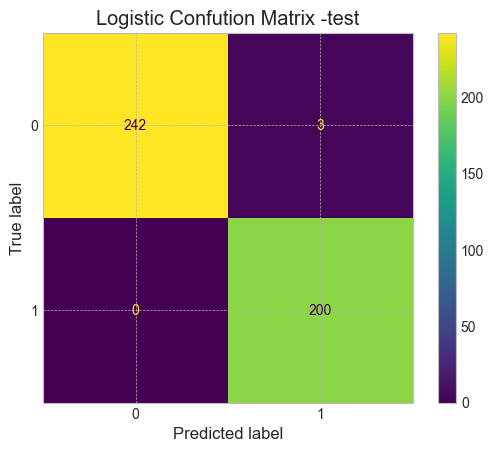

In [31]:
y_test_pred = lr.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test , y_test_pred)
plt.title('Logistic Confution Matrix -test')

### Accuracy score

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
lr_acc_train = lr.score(X_train,y_train)
lr_acc_test = lr.score(X_test,y_test)
lr_acc_test

0.9932584269662922

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       493
           1       0.99      1.00      0.99       410

    accuracy                           0.99       903
   macro avg       0.99      0.99      0.99       903
weighted avg       0.99      0.99      0.99       903



In [35]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       245
           1       0.99      1.00      0.99       200

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [37]:
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Text(0.5, 1.0, 'RandomForest Confution Metrix Train')

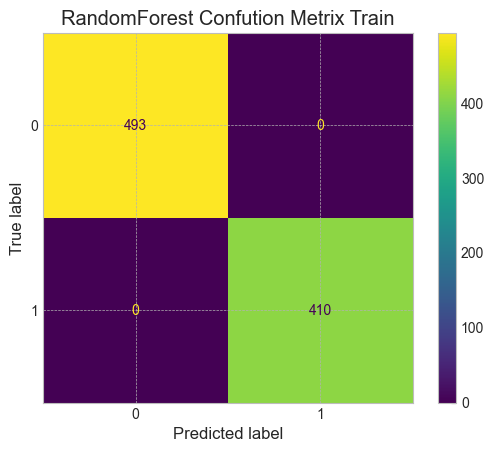

In [38]:
ConfusionMatrixDisplay.from_estimator(
    rf,
    X_train,
    y_train
)
plt.title('RandomForest Confution Metrix Train')

Text(0.5, 1.0, 'RandomForest Confution Matrix - Test')

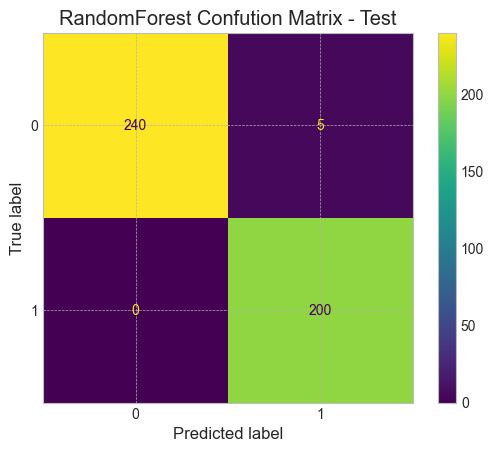

In [39]:
ConfusionMatrixDisplay.from_estimator(
    rf,
    X_test,
    y_test
)
plt.title('RandomForest Confution Matrix - Test')

## Accuracy Score

In [40]:
rf_acc_train = rf.score(X_train,y_train)
rf_acc_test = rf.score(X_test , y_test)
rf_acc_train

1.0

In [42]:
print(classification_report(y_train,rf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       410

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903



In [43]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.98      1.00      0.99       200

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



## Tree Plot

In [44]:
from sklearn.tree import plot_tree


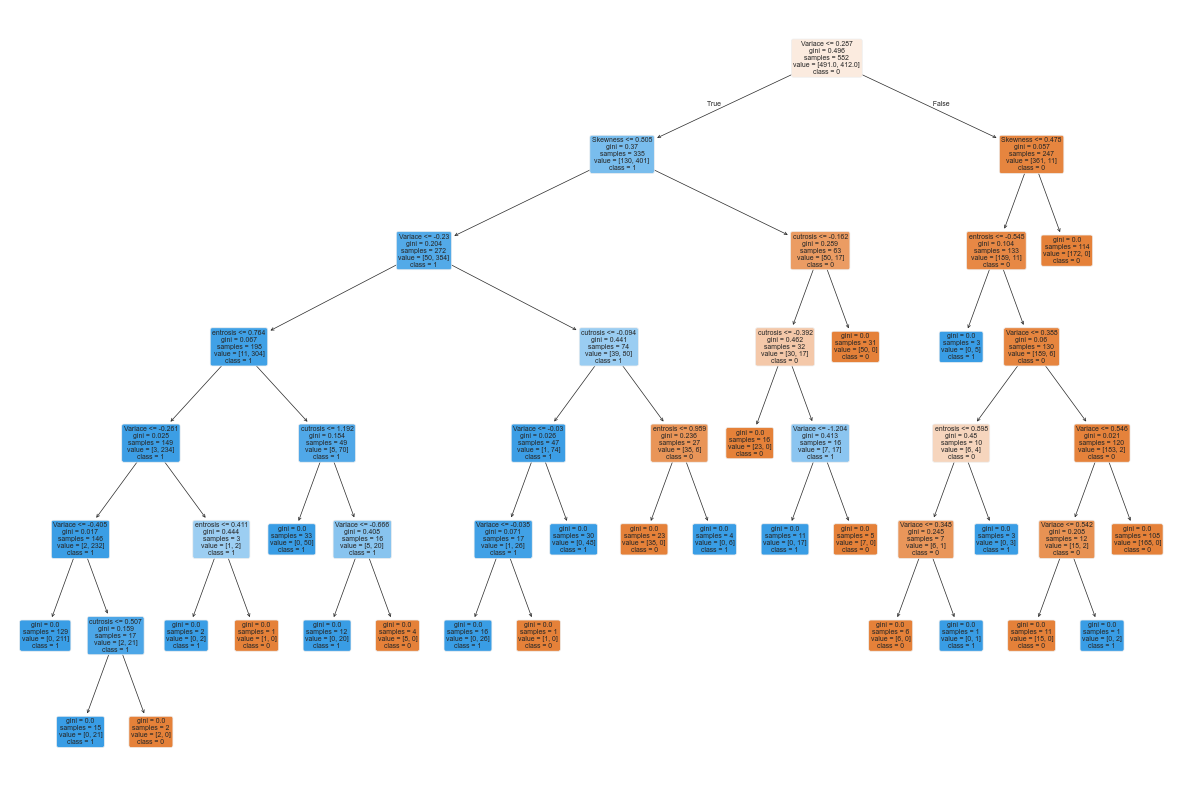

In [48]:
plt.figure(figsize=(15,10))
plot_tree(
    rf.estimators_[0],
    feature_names=df.columns[:4],
    class_names=['0','1'],
    filled=True,
    impurity=True,
    rounded=True
)
plt.show()

### Model Summary

In [51]:
models = pd.DataFrame({
    'Model': [
              'Log Reg train',
              'Log Reg test',
              'Rand Forest train',
              'Rand Forest test',
              ],
    'Score':[lr_acc_train,
             lr_acc_test,
             rf_acc_train,
             rf_acc_test
             ]
})
models

,Model,Score
0,Log Reg train,0.992248
1,Log Reg test,0.993258
2,Rand Forest train,1.000000
3,Rand Forest test,0.988764
